## Importing essential libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [57]:
df = pd.read_csv('tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## Column Transformation

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns = list(df.columns)
columns.remove('play')

for column in columns:
    df[column] = le.fit_transform(df[column])

df

,outlook,temp,humidity,windy,play
0,2,1,0,0,no
1,2,1,0,1,no
2,0,1,0,0,yes
3,1,2,0,0,yes
4,1,0,1,0,yes
5,1,0,1,1,no
6,0,0,1,1,yes
7,2,2,0,0,no
8,2,0,1,0,yes
9,1,2,1,0,yes


## Allocating column values to x&y variables

In [59]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(x)
print(X)

[[ 1.16275535 -0.17149859 -1.         -0.8660254 ]
 [ 1.16275535 -0.17149859 -1.          1.15470054]
 [-1.34164079 -0.17149859 -1.         -0.8660254 ]
 [-0.08944272  1.02899151 -1.         -0.8660254 ]
 [-0.08944272 -1.37198868  1.         -0.8660254 ]
 [-0.08944272 -1.37198868  1.          1.15470054]
 [-1.34164079 -1.37198868  1.          1.15470054]
 [ 1.16275535  1.02899151 -1.         -0.8660254 ]
 [ 1.16275535 -1.37198868  1.         -0.8660254 ]
 [-0.08944272  1.02899151  1.         -0.8660254 ]
 [ 1.16275535  1.02899151  1.          1.15470054]
 [-1.34164079  1.02899151 -1.          1.15470054]
 [-1.34164079 -0.17149859  1.         -0.8660254 ]
 [-0.08944272  1.02899151 -1.          1.15470054]]


## Splitting the Dataset

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## Training the DTC Model

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

## Predicting values

In [63]:
Y_pred = dtc.predict(X_test)
print(Y_pred)

['no' 'yes' 'yes']


## Model Visualization (optional)

[Text(223.20000000000002, 190.26, 'humidity <= 0.0\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = yes'),
 Text(167.4, 135.9, 'outlook <= 0.537\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = no'),
 Text(111.60000000000001, 81.53999999999999, 'windy <= 0.144\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = yes'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = yes')]

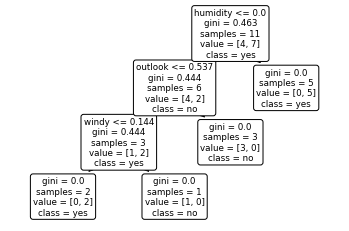

In [64]:
tree.plot_tree(dtc, feature_names = columns, class_names = Y_pred, rounded = True)